In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv(r"C:/Users/LENOVE/Desktop/Machine Learning/Datasets/uci-secom.csv")

In [4]:
dataset

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [5]:
dataset.shape

(1567, 592)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [8]:
dataset.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

In [9]:
dataset.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [12]:
dataset['Time'] = pd.to_datetime(dataset['Time'])
print(dataset['Time'].dtypes)

datetime64[ns]


In [13]:
dataset.dtypes

Time         datetime64[ns]
0                   float64
1                   float64
2                   float64
3                   float64
                  ...      
586                 float64
587                 float64
588                 float64
589                 float64
Pass/Fail             int64
Length: 592, dtype: object

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
dataset.select_dtypes(include="float64").columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '580', '581', '582', '583', '584', '585', '586', '587', '588', '589'],
      dtype='object', length=590)

In [16]:
si = SimpleImputer(strategy="mean")

# Example: columns '1', '2', '3', '4' mein null values fill karni hain
cols = ['0','1', '2', '3', '4']

dataset[cols] = si.fit_transform(dataset[cols])


In [18]:
si = SimpleImputer(strategy="mean")

# 2. Select all columns (from '0' to '589')
cols = [str(i) for i in range(590)]   # converts 0–589 to string names

# 3. Apply imputer to all selected columns
dataset[cols] = si.fit_transform(dataset[cols])

# 4. Verify null values removed
print(dataset.isnull().sum().sum()) 

0


In [19]:
dataset.isnull().sum()

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 592, dtype: int64

In [20]:
dataset.dtypes


Time         datetime64[ns]
0                   float64
1                   float64
2                   float64
3                   float64
                  ...      
586                 float64
587                 float64
588                 float64
589                 float64
Pass/Fail             int64
Length: 592, dtype: object

In [21]:
# Extracting time components
dataset['Hour'] = dataset['Time'].dt.hour
dataset['Minute'] = dataset['Time'].dt.minute
dataset['Second'] = dataset['Time'].dt.second


C:\Users\LENOVE\AppData\Local\Temp\ipykernel_8064\606326516.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset['Hour'] = dataset['Time'].dt.hour
C:\Users\LENOVE\AppData\Local\Temp\ipykernel_8064\606326516.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset['Minute'] = dataset['Time'].dt.minute
C:\Users\LENOVE\AppData\Local\Temp\ipykernel_8064\606326516.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

In [22]:
dataset.drop('Time', axis=1, inplace=True)


In [23]:
print(dataset.dtypes)


0            float64
1            float64
2            float64
3            float64
4            float64
              ...   
589          float64
Pass/Fail      int64
Hour           int32
Minute         int32
Second         int32
Length: 594, dtype: object


In [24]:
dataset = dataset.apply(pd.to_numeric, errors='coerce')


In [25]:
print(dataset.dtypes)


0            float64
1            float64
2            float64
3            float64
4            float64
              ...   
589          float64
Pass/Fail      int64
Hour           int32
Minute         int32
Second         int32
Length: 594, dtype: object


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [28]:
X = dataset.drop('Pass/Fail', axis=1)
y = dataset['Pass/Fail']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
# y_pred = model.predict(X_test)
y_pred_class = [1 if p >= 0 else -1 for p in y_pred]
print(y_pred_class)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class))
print("Classification Report:\n", classification_report(y_test, y_pred_class))


Accuracy: 0.9171974522292994
Confusion Matrix:
 [[284   6]
 [ 20   4]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.93      0.98      0.96       290
           1       0.40      0.17      0.24        24

    accuracy                           0.92       314
   macro avg       0.67      0.57      0.60       314
weighted avg       0.89      0.92      0.90       314



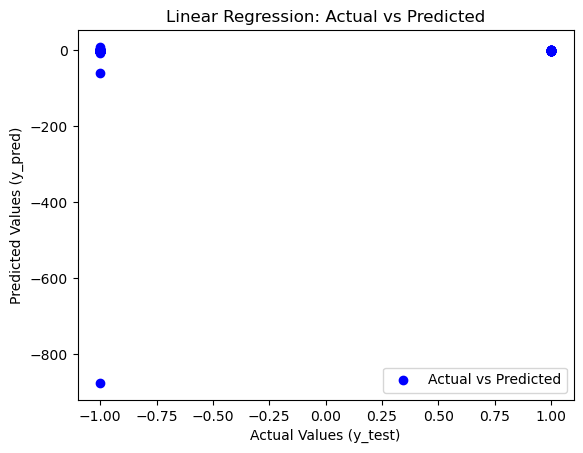

In [45]:
import matplotlib.pyplot as plt

# Actual vs Predicted on test data only
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()


In [46]:
dataset.to_csv("C:/Users/LENOVE/Desktop/Machine Learning/Datasets/uci_linear_regression_predictions.csv", index=False)
print("✅ File saved successfully as 'uci_linear_regression_predictions.csv'")

✅ File saved successfully as 'uci_linear_regression_predictions.csv'


In [47]:
# Predict on full dataset
y_pred_full = model.predict(X)


In [48]:
dataset['Predicted_PassFail'] = [1 if p >= 0 else -1 for p in y_pred_full]


In [49]:
print(dataset.head())


         0        1          2          3       4      5         6       7  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   

        8       9  ...      585       586       587       588         589  \
0  1.5005  0.0162  ...   2.3630  0.021458  0.016475  0.005283   99.670066   
1  1.4966 -0.0005  ...   4.4447  0.009600  0.020100  0.006000  208.204500   
2  1.4436  0.0041  ...   3.1745  0.058400  0.048400  0.014800   82.860200   
3  1.4882 -0.0124  ...   2.0544  0.020200  0.014900  0.004400   73.843200   
4  1.5031 -0.0031  ...  99.3032  0.020200  0.014900  0.004400   73.843200   

   Pass/Fail  Hour  Minute  Second  Predicted_PassFail  
0         -

In [50]:
dataset.shape

(1567, 595)

In [52]:
dataset.isnull().sum()

0                     0
1                     0
2                     0
3                     0
4                     0
                     ..
Pass/Fail             0
Hour                  0
Minute                0
Second                0
Predicted_PassFail    0
Length: 595, dtype: int64

In [53]:
dataset.to_csv("uci_linear_regression_with_predictions.csv", index=False)
print("✅ File saved successfully as 'uci_linear_regression_with_predictions.csv'")


✅ File saved successfully as 'uci_linear_regression_with_predictions.csv'


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = dataset.drop('Pass/Fail', axis=1)
y = dataset['Pass/Fail']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9320594479830149
Confusion Matrix:
 [[438   4]
 [ 28   1]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.94      0.99      0.96       442
           1       0.20      0.03      0.06        29

    accuracy                           0.93       471
   macro avg       0.57      0.51      0.51       471
weighted avg       0.89      0.93      0.91       471



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
print("y_test length:", len(y_test))
print("y_pred_class length:", len(y_pred_class))


y_test length: 471
y_pred_class length: 314


In [75]:
y_test_array = y_test.to_numpy().flatten()  # ensures 1D array
y_pred_array = np.array(y_pred_class).flatten()  # ensures 1D array


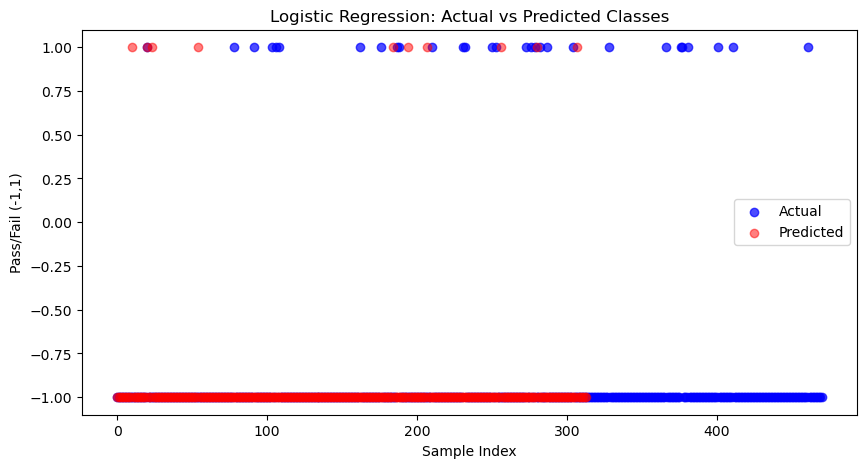

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(range(len(y_test_array)), y_test_array, color='blue', label='Actual', alpha=0.7)
plt.scatter(range(len(y_pred_array)), y_pred_array, color='red', label='Predicted', alpha=0.5)

plt.xlabel("Sample Index")
plt.ylabel("Pass/Fail (-1,1)")
plt.title("Logistic Regression: Actual vs Predicted Classes")
plt.legend()
plt.show()
